In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.loadtxt('kmeans_data.csv', delimiter=',')
print('数据集大小：', len(dataset))

数据集大小： 80


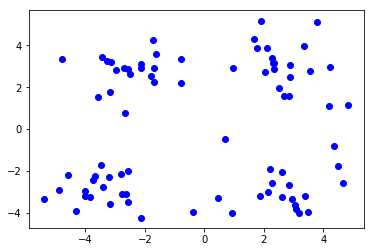

In [2]:
# 绘图函数
def show_cluster(dataset, cluster, centroids=None):  
    # dataset：数据
    # centroids：聚类中心点的坐标
    # cluster：每个样本所属聚类
    # 不同种类的颜色，用以区分划分的数据的类别
    colors = ['blue', 'red', 'green', 'purple']
    markers = ['o', '^', 's', 'd']
    # 画出所有样例
    K = len(np.unique(cluster))
    for i in range(K):
        plt.scatter(dataset[cluster == i, 0], dataset[cluster == i, 1], color=colors[i], marker=markers[i])

    # 画出中心点
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color=colors[:K], marker='+', s=150)  
        
    plt.show()

# 初始时不区分类别
show_cluster(dataset, np.zeros(len(dataset), dtype=int))

In [3]:
def random_init(dataset, K):
    # 随机选取是不重复的
    idx = np.random.choice(np.arange(len(dataset)), size=K, replace=False)
    return dataset[idx]

In [4]:
def Kmeans(dataset, K, init_cent):
    # dataset：数据集
    # K：目标聚类数
    # init_cent：初始化中心点的函数
    centroids = init_cent(dataset, K)
    cluster = np.zeros(len(dataset), dtype=int)
    changed = True
    # 开始迭代
    itr = 0
    while changed:
        changed = False
        loss = 0
        for i, data in enumerate(dataset):
            # 寻找最近的中心点
            dis = np.sum((centroids - data) ** 2, axis=-1)
            k = np.argmin(dis)
            # 更新当前样本所属的聚类
            if cluster[i] != k:
                cluster[i] = k
                changed = True
            # 计算损失函数
            loss += np.sum((data - centroids[k]) ** 2)
        # 绘图
        print(f'Iteration {itr}, Loss {loss:.3f}')
        show_cluster(dataset, cluster, centroids)
        # 更新中心点
        for i in range(K):
            centroids[i] = np.mean(dataset[cluster == i], axis=0)
        itr += 1

    return centroids, cluster

Iteration 0, Loss 711.336


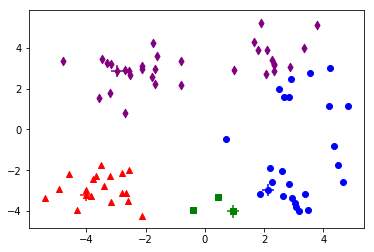

Iteration 1, Loss 409.495


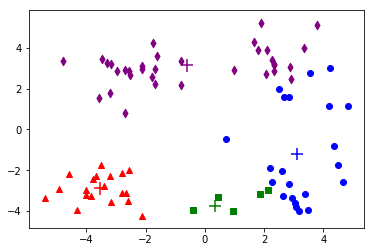

Iteration 2, Loss 395.264


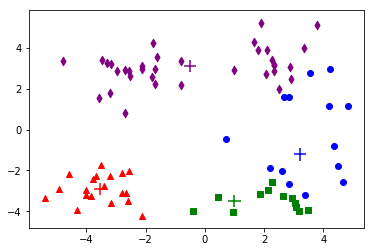

Iteration 3, Loss 346.068


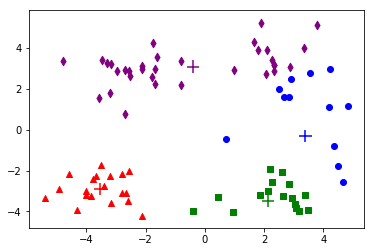

Iteration 4, Loss 294.244


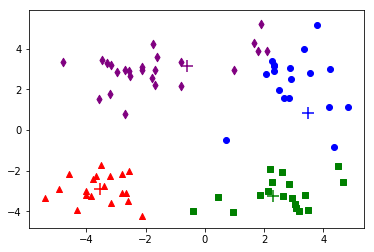

Iteration 5, Loss 178.808


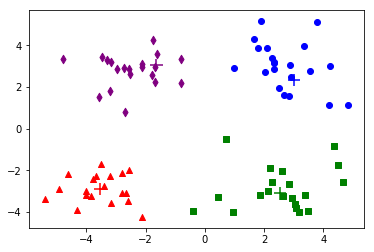

Iteration 6, Loss 151.090


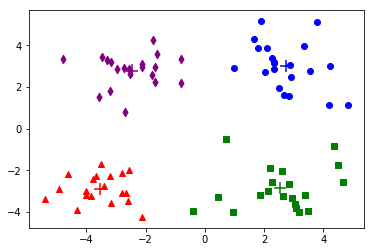

In [5]:
np.random.seed(0)
cent, cluster = Kmeans(dataset, 4, random_init)

In [7]:
def kmeanspp_init(dataset, K):
    # 随机第一个中心点
    idx = np.random.choice(np.arange(len(dataset)))
    centroids = dataset[idx][None]
    for k in range(1, K):
        d = []
        # 计算每个点到当前中心点的距离
        for data in dataset:
            dis = np.sum((centroids - data) ** 2, axis=-1)
            # 取最短距离的平方
            d.append(np.min(dis) ** 2)
        # 归一化
        d = np.array(d)
        d /= np.sum(d)
        # 按概率选取下一个中心点
        cent_id = np.random.choice(np.arange(len(dataset)), p=d)
        cent = dataset[cent_id]
        centroids = np.concatenate([centroids, cent[None]], axis=0)

    return centroids

Iteration 0, Loss 373.939


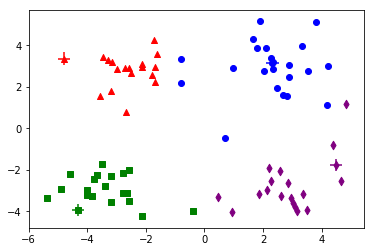

Iteration 1, Loss 158.147


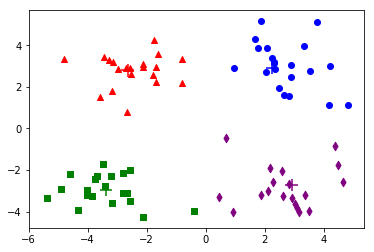

Iteration 2, Loss 151.273


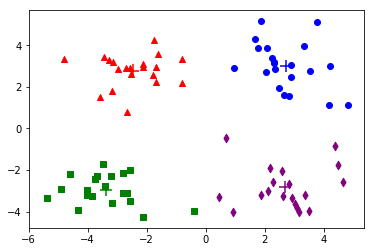

In [8]:
cent, cluster = Kmeans(dataset, 4, kmeanspp_init)

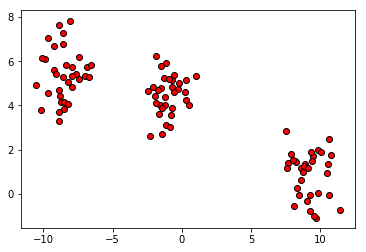

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
blobs = make_blobs(random_state=7,centers=3)
X_blobs = blobs[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1],c='r',edgecolors='k')
plt.show()

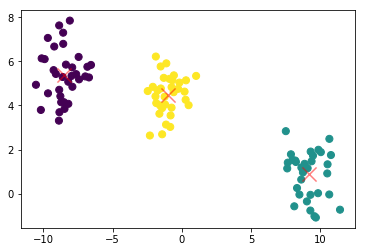

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs)
y_kmeans = kmeans.predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],marker='x',c='r', s=200, alpha=0.5)
plt.show()

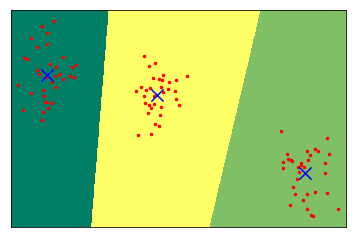

In [7]:
# 导入必要的库
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# 生成带有3个中心的随机数据点
blobs = make_blobs(random_state=7, centers=3)
X_blobs = blobs[0]

# 绘制原始数据点
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='r', edgecolors='k')

# 创建KMeans聚类模型，设置聚类数为3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs)

# 定义图形的边界
X_min, X_max = X_blobs[:, 0].min() - 0.5, X_blobs[:, 0].max() + 0.5
y_min, y_max = X_blobs[:, 1].min() - 0.5, X_blobs[:, 1].max() + 0.5
# 创建网格用于绘制决策边界
xx, yy = np.meshgrid(np.arange(X_min, X_max, .02), np.arange(y_min, y_max, .02))

# 使用KMeans模型预测网格上的每个点的聚类
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 创建新的图形并清空之前的内容
plt.figure(1)
plt.clf()
# 绘制聚类决策边界
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.summer, aspect='auto', origin='lower')
# 绘制原始数据点
plt.plot(X_blobs[:, 0], X_blobs[:, 1], 'r.', markersize=5)
# 绘制聚类中心
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=3, color='b', zorder=10)
# 设置图形的显示范围
plt.xlim(X_min, X_max)
plt.ylim(y_min, y_max)
# 隐藏坐标轴刻度
plt.xticks(())
plt.yticks(())
# 显示图形
plt.show()

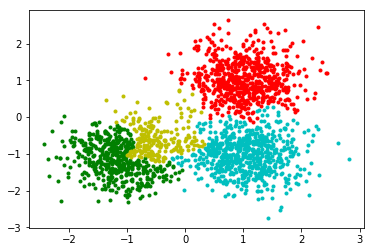

In [8]:
# 导入必要的库
from sklearn.datasets import make_blobs  # 生成随机数据的模块
from sklearn.cluster import AgglomerativeClustering  # 导入层次聚类模型
import numpy as np  # 数值计算库
import matplotlib.pyplot as plt  # 绘图库
from itertools import cycle  # 用于循环颜色的迭代器模块

# 定义数据中心
centers = [[1, 1], [-1, -1], [1, -1]]
# 生成随机数据，n_samples是样本数量，centers是中心位置，cluster_std是簇的标准差
X, labels_true = make_blobs(n_samples=2000, centers=centers, cluster_std=0.5, random_state=22)
# 创建层次聚类模型，使用ward链接方法，期望聚类数为4
ac = AgglomerativeClustering(linkage='ward', n_clusters=4)
# ac = AgglomerativeClustering(linkage='average', n_clusters=4)
# ac = AgglomerativeClustering(linkage='complete', n_clusters=4)
# 训练模型并对数据进行聚类
ac.fit(X)

# 获取每个数据点的分类标签
labels = ac.labels_
# 绘图
plt.figure(1)  # 创建一个新图形
plt.clf()  # 清空当前图形
# 定义颜色循环，使用'r','g','c','y'四种颜色
colors = cycle('rgcy')
# 遍历每个聚类标签（0到3），并绘制相应的数据点
for k, col in zip(range(4), colors):
    # 创建一个布尔数组，标识哪些点属于当前聚类
    my_members = labels == k
    # 绘制属于当前聚类的点，X[my_members,0]为横坐标，X[my_members,1]为纵坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
# 显示绘制的图形
plt.show()

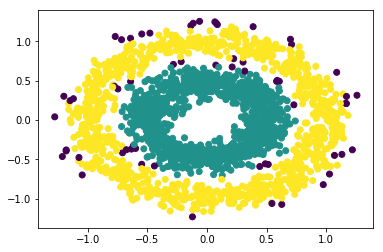

In [36]:
from sklearn.datasets.samples_generator import make_circles
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
X, y_true = make_circles(n_samples=2000, factor=0.5,noise=0.1)  # 这是环状数据

# DBSCAN算法
dbscan = DBSCAN(eps=.1, min_samples=10)
dbscan.fit(X)  # 该算法对应的两个参数
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

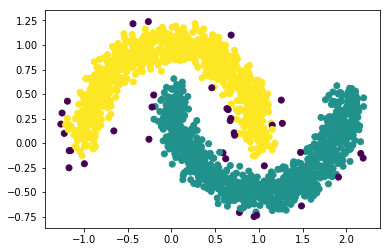

In [38]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
X, y_true = make_moons(n_samples=2000, noise=0.1)    # 双半月数据

# DBSCAN算法
dbscan = DBSCAN(eps=.1, min_samples=10)
dbscan.fit(X)  # 该算法对应的两个参数
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

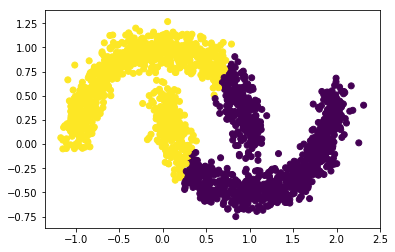

In [41]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X, y_true = make_moons(n_samples=2000,noise=0.1)
# KMeans算法
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)  # 该算法对应的两个参数
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()

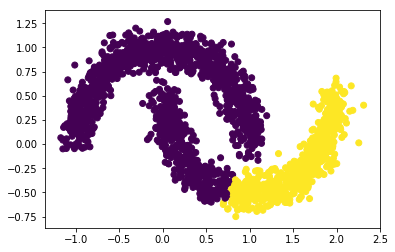

In [42]:
# 层次聚类
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=ac.labels_)
plt.show()